In [9]:
pip install opencv-python

     |████████████████████████████████| 50.4 MB 49 kB/s s eta 0:00:01    |█████████▉                      | 15.5 MB 7.4 MB/s eta 0:00:05
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [3]:
DATADIR = "face_classification/train/"

CATEGORIES = ["sanjay", "jo"]

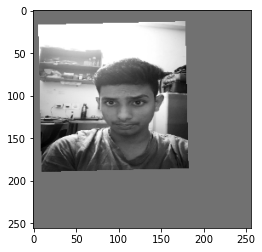

In [4]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break

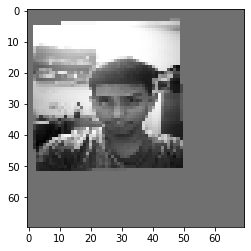

In [5]:
IMG_SIZE = 70
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [7]:
create_training_data()


100%|██████████| 1212/1212 [00:06<00:00, 192.36it/s]


In [8]:
len(training_data)

2424

In [9]:
import random

random.shuffle(training_data)

In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X.shape

(2424, 70, 70, 1)

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
X = X/255.0

In [13]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
X = np.array(X)
X.shape
y1 = np.array(y)
y1

array([1, 0, 0, ..., 1, 0, 0])

In [21]:
model.fit(X, y1, batch_size=32, epochs=3)

Epoch 1/3
76/76 [==============================] - 108s 1s/step - loss: 0.7187 - accuracy: 0.6176
Epoch 2/3
76/76 [==============================] - 111s 1s/step - loss: 0.4761 - accuracy: 0.7842
Epoch 3/3
76/76 [==============================] - 112s 1s/step - loss: 0.4260 - accuracy: 0.8115
